In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
data= pd.read_csv("Titanic_Dataset.csv")

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape

(891, 12)

In [8]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
median_ages=data.groupby(['Sex','Pclass'])['Age'].median()

In [11]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return median_ages.by_group.loc[row['Sex'],row['Pclass']]
    else:
        return row['Age']
median_ages.by_group = data.groupby(['Sex','Pclass'])["Age"].median()
data['Age']=data.apply(fill_age,axis=1)

In [12]:
data.drop('Cabin',axis=1,inplace=True)

In [13]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
data['Title']=data['Name'].str.extract('([A-za-z]+)\.',expand=False)

print(data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [16]:
data['Title']=data['Title'].replace({
    'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs','Dr':'Officer','Rev':'Officer','Col': 'Officer','Major':'Officer',
    'Capt':'Officer','Don':'Royalty','Sir':'Royalty','Lady':'Royalty','Countess':'Royalty','Jonkheer':'Royalty'})

print(data['Title'].value_counts())

Title
Mr         517
Miss       185
Mrs        126
Master      40
Officer     18
Royalty      5
Name: count, dtype: int64


In [17]:
#data[data['Name'].str.contains('Don\.')]

In [18]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

title_mapping={
    'Mr':0,
    'Miss':1,
    'Mrs':2,
    'Master':3,
    'Royalty':4,
    'Officer':5
}

data['Title']=data['Title'].map(title_mapping)
print(data['Title'].isnull().sum())
print(data[['Name','Title']].head(50))

27
                                                 Name  Title
0                             Braund, Mr. Owen Harris    0.0
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    2.0
2                              Heikkinen, Miss. Laina    1.0
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    2.0
4                            Allen, Mr. William Henry    0.0
5                                    Moran, Mr. James    0.0
6                             McCarthy, Mr. Timothy J    0.0
7                      Palsson, Master. Gosta Leonard    3.0
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    2.0
9                 Nasser, Mrs. Nicholas (Adele Achem)    2.0
10                    Sandstrom, Miss. Marguerite Rut    1.0
11                           Bonnell, Miss. Elizabeth    1.0
12                     Saundercock, Mr. William Henry    0.0
13                        Andersson, Mr. Anders Johan    0.0
14               Vestrom, Miss. Hulda Amanda Adolfina    1.0
15                   

#### EDA


In [19]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


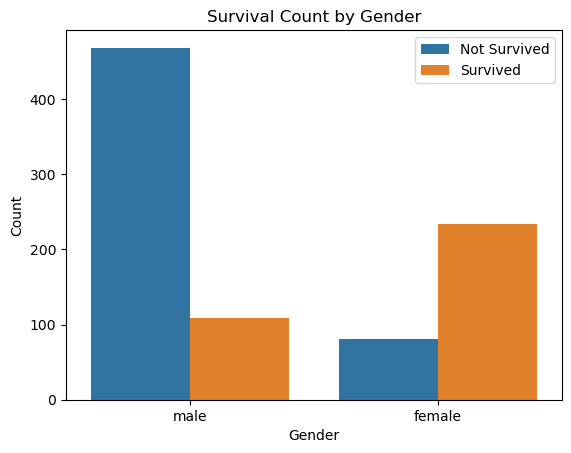

In [20]:
sns.countplot(x="Sex",hue='Survived',data=data)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Not Survived", "Survived"])
plt.show()

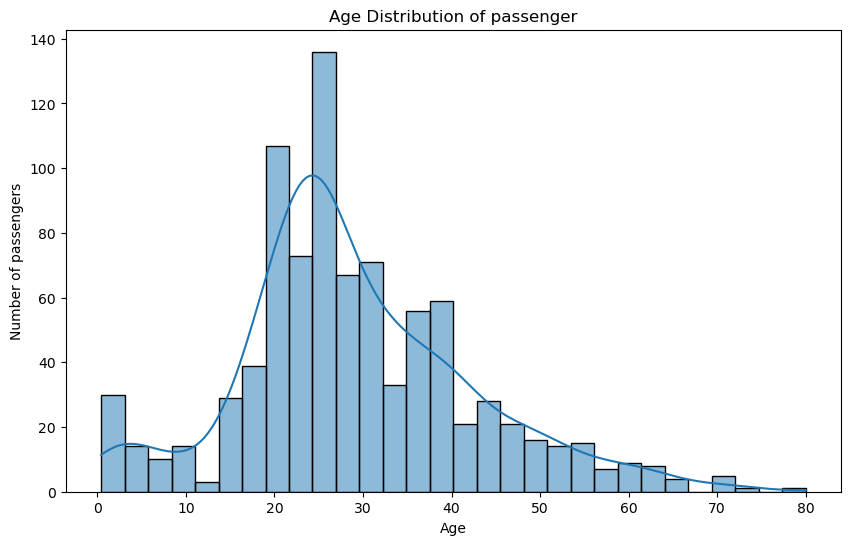

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Age',bins=30,kde=True)
plt.title("Age Distribution of passenger")
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.show()

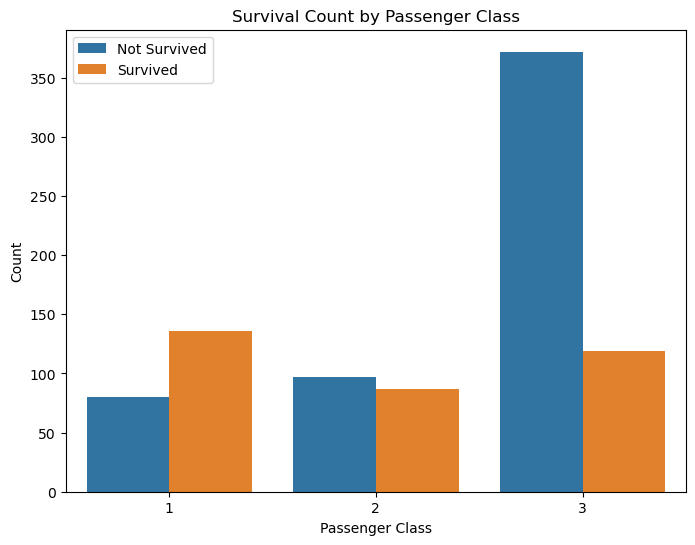

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


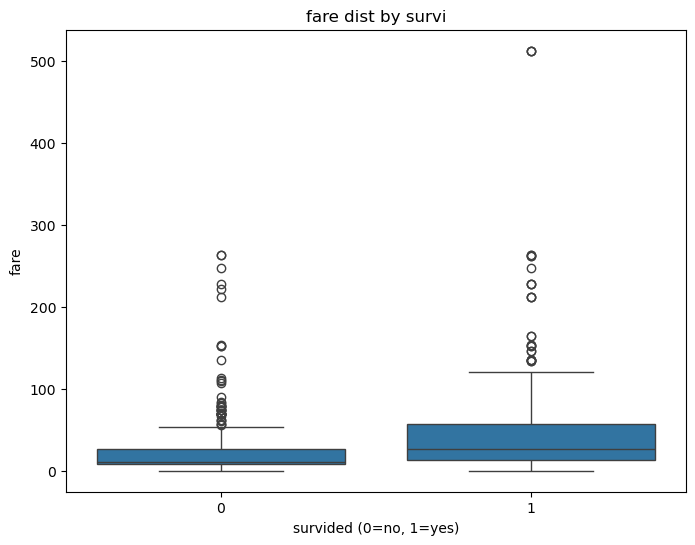

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x="Survived",y='Fare')
plt.title("fare dist by survi")
plt.xlabel('survided (0=no, 1=yes)')
plt.ylabel('fare')
plt.show()

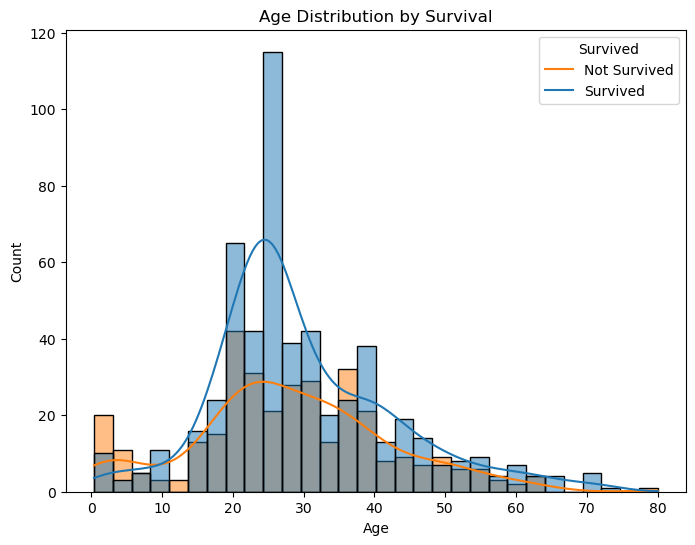

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


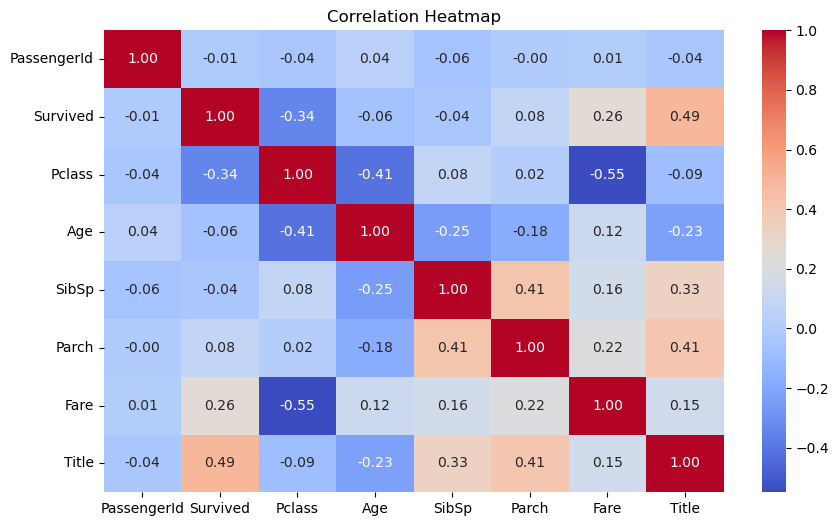

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [29]:
data['Sex']=LabelEncoder().fit_transform(data['Sex'])
data['Embarked']=data['Embarked'].fillna('S')
data['Embarked']=LabelEncoder().fit_transform(data['Embarked'])
data['Age']=data['Age'].fillna(data['Age'].median())

In [31]:
y= data['Survived']
x=data.drop(columns=['PassengerId','Name','Ticket','Survived'])

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

### random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [40]:
y_pred=model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8212290502793296


In [43]:
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[95 15]
 [17 52]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

